In [101]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import BatchNormalization, Dense
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder

In [102]:
# os.mkdir('dataset')
dataset_dir = 'dataset'
target_file = 'indeks-pencemaran-udara-dki.zip'

In [103]:
with zipfile.ZipFile(target_file, 'r') as extracting:
    extracting.extractall(dataset_dir)

In [104]:
df = pd.read_csv(f'{dataset_dir}/Indeks Standar Pencemar Udara di Provinsi DKI Jakarta 2021.csv')


In [105]:
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


In [107]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,365.000000,334.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.506849,94.694611,52.753425,15.391781,49.805479,34.115068,94.030137
std,15.155896,24.153839,11.193823,5.857975,12.234790,15.974152,24.408647
min,19.000000,33.000000,37.000000,7.000000,20.000000,9.000000,45.000000
25%,53.000000,78.250000,45.000000,11.000000,41.000000,24.000000,77.000000
50%,62.000000,94.500000,52.000000,14.000000,49.000000,31.000000,93.000000
75%,68.000000,108.750000,55.000000,18.000000,57.000000,39.000000,108.000000
max,179.000000,174.000000,126.000000,47.000000,151.000000,134.000000,179.000000


In [108]:
# Handle missing values
df['pm25'].fillna(df['pm25'].mean(), inplace=True)

# Convert 'tanggal' to datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

df['month'] = df['tanggal'].dt.month
df['day'] = df['tanggal'].dt.day


C:\Users\USER\AppData\Local\Temp\ipykernel_42512\2871824287.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm25'].fillna(df['pm25'].mean(), inplace=True)


In [109]:
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,month,day
0,2021-01-01,43,94.694611,58,29,35,65,65,O3,SEDANG,DKI2,1,1
1,2021-01-02,58,94.694611,86,38,64,80,86,PM25,SEDANG,DKI3,1,2
2,2021-01-03,64,94.694611,93,25,62,86,93,PM25,SEDANG,DKI3,1,3
3,2021-01-04,50,94.694611,67,24,31,77,77,O3,SEDANG,DKI2,1,4
4,2021-01-05,59,94.694611,89,24,35,77,89,PM25,SEDANG,DKI3,1,5


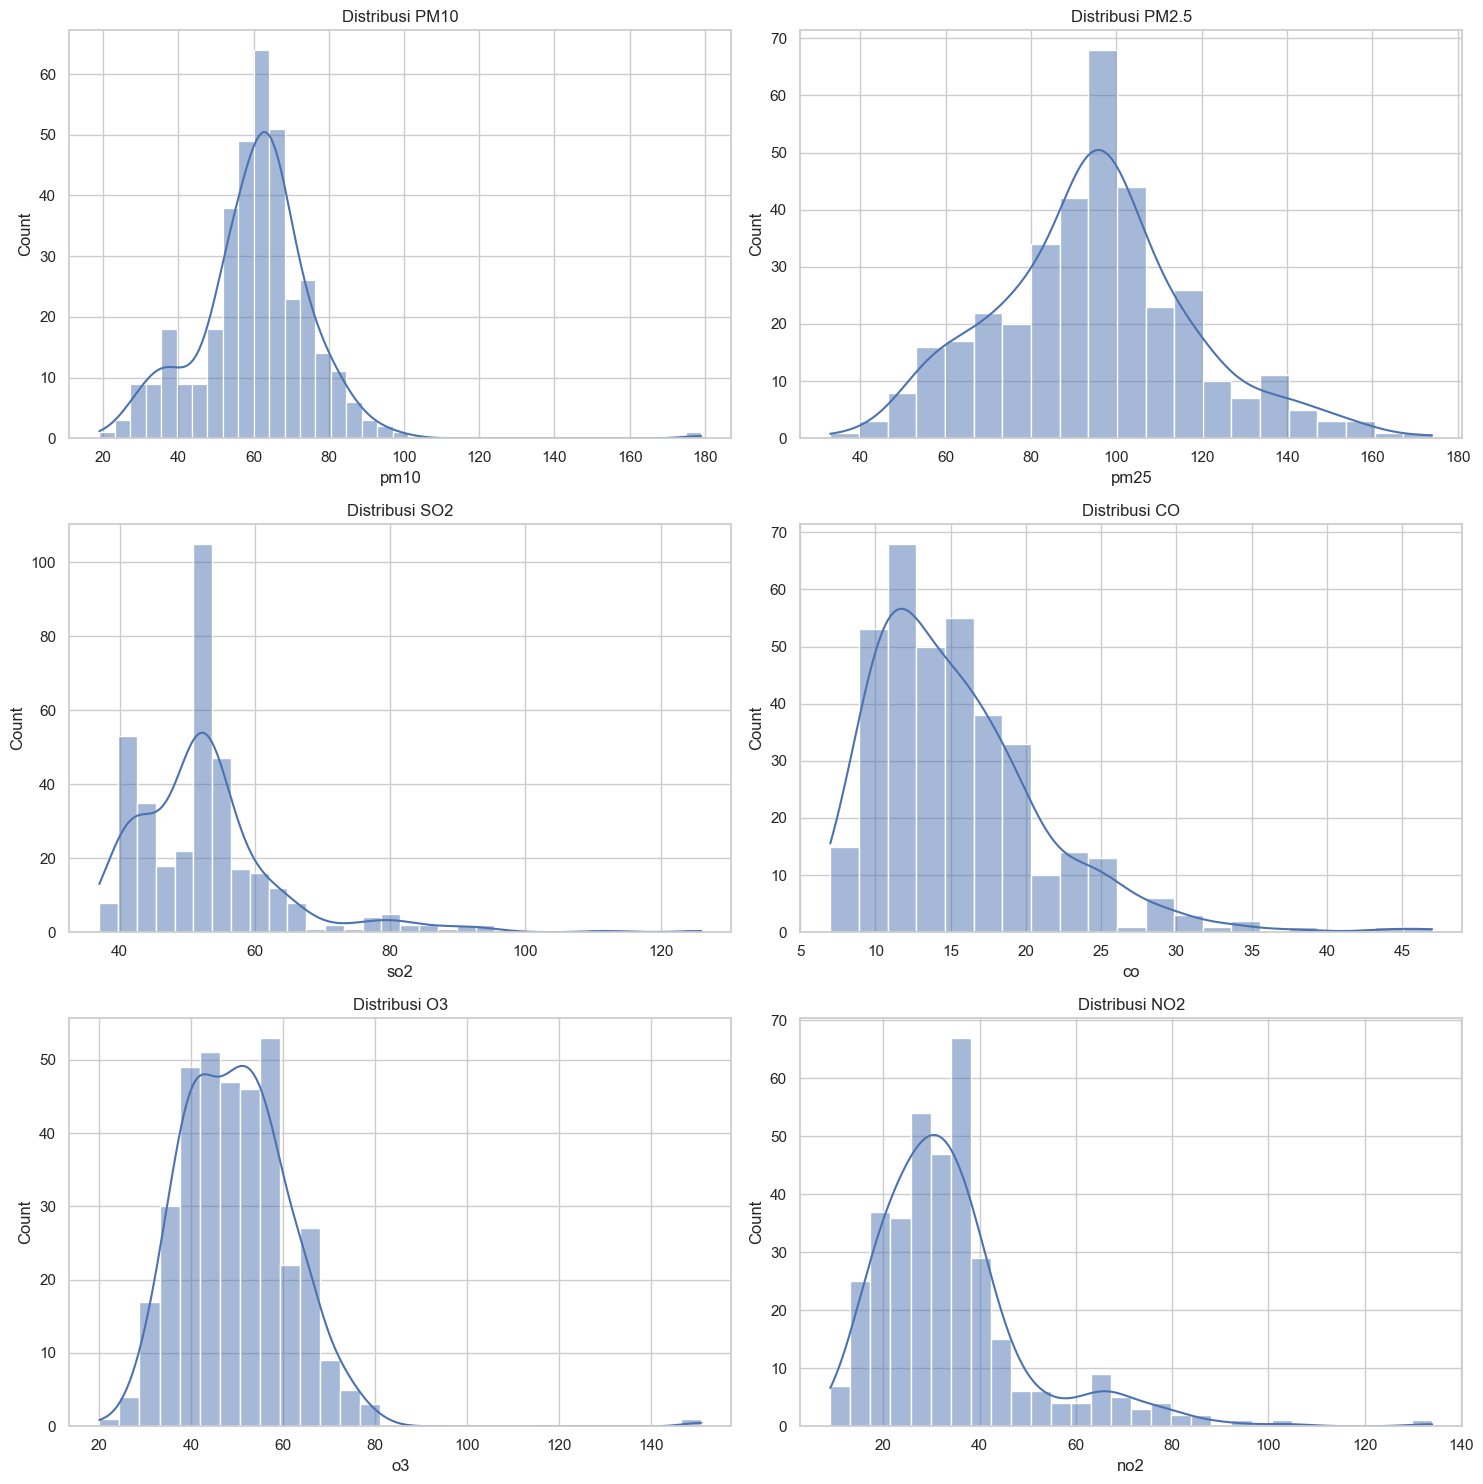

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualisasi Distribusi Data Pencemar Udara
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df['pm10'], kde=True, ax=axs[0, 0]).set_title('Distribusi PM10')
sns.histplot(df['pm25'], kde=True, ax=axs[0, 1]).set_title('Distribusi PM2.5')
sns.histplot(df['so2'], kde=True, ax=axs[1, 0]).set_title('Distribusi SO2')
sns.histplot(df['co'], kde=True, ax=axs[1, 1]).set_title('Distribusi CO')
sns.histplot(df['o3'], kde=True, ax=axs[2, 0]).set_title('Distribusi O3')
sns.histplot(df['no2'], kde=True, ax=axs[2, 1]).set_title('Distribusi NO2')

plt.tight_layout()
plt.show()

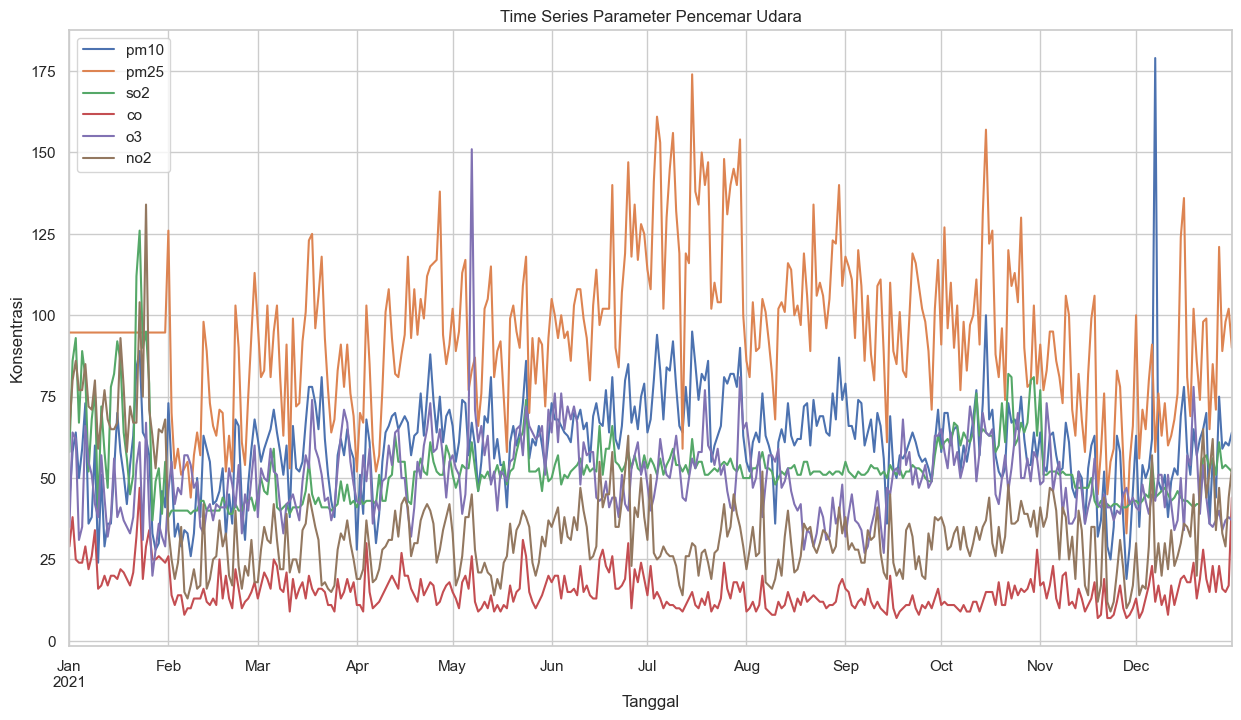

In [111]:
# Visualisasi Time Series untuk parameter pencemar udara
fig, ax = plt.subplots(figsize=(15, 8))
df.set_index('tanggal')[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']].plot(ax=ax)
plt.title('Time Series Parameter Pencemar Udara')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_42512\2874840770.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='categori', palette='viridis', ax=ax)


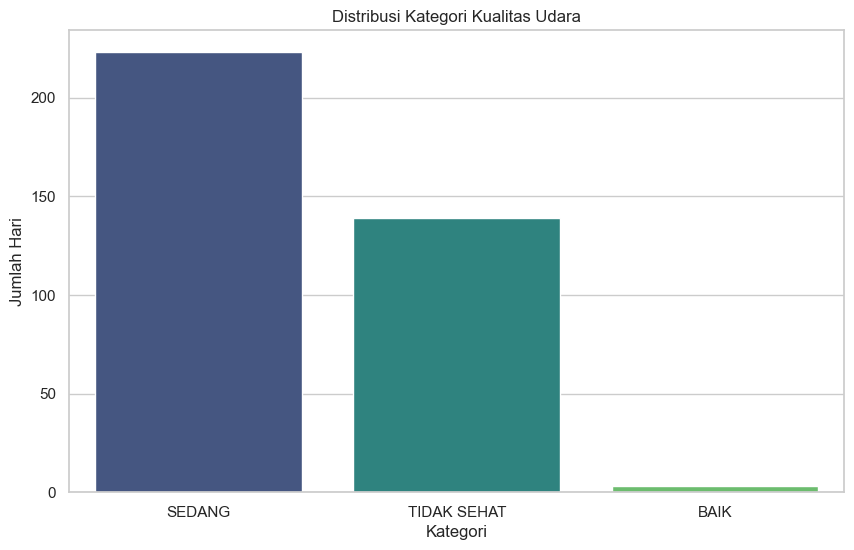

In [112]:
# Visualisasi Kategori Kualitas Udara
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data=df, x='categori', palette='viridis', ax=ax)
plt.title('Distribusi Kategori Kualitas Udara')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Hari')
plt.show()

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Create categorical labels based on 'max' values
bins = [0, 50, 100, np.inf]
labels = ['BAIK', 'SEDANG', 'TIDAK SEHAT']
df['category'] = pd.cut(df['max'], bins=bins, labels=labels)

# Encode categorical labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Prepare input features and target
X = df[['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'month', 'day']]
y = df['category_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [141]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build neural network model
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(len(labels), activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.3)

# Evaluate the model
loss, mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error: {mse}')


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 1.1006 - sparse_categorical_accuracy: 0.4035 - val_loss: 0.5872 - val_sparse_categorical_accuracy: 0.8295
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4599 - sparse_categorical_accuracy: 0.8710 - val_loss: 0.2648 - val_sparse_categorical_accuracy: 0.8523
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2222 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.2567 - val_sparse_categorical_accuracy: 0.8523
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2392 - sparse_categorical_accuracy: 0.9514 - val_loss: 0.1981 - val_sparse_categorical_accuracy: 0.8864
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9497 - val_loss: 0.2016 - val_sparse_categorical_accuracy: 0.8977
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1182 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.1329 - val_sparse_categorical_accuracy: 0.9545
Epoch 7/50
7/7 ━━━━━━━━━━

In [139]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.5077 - sparse_categorical_accuracy: 0.9130
Accuracy: 0.9041095972061157


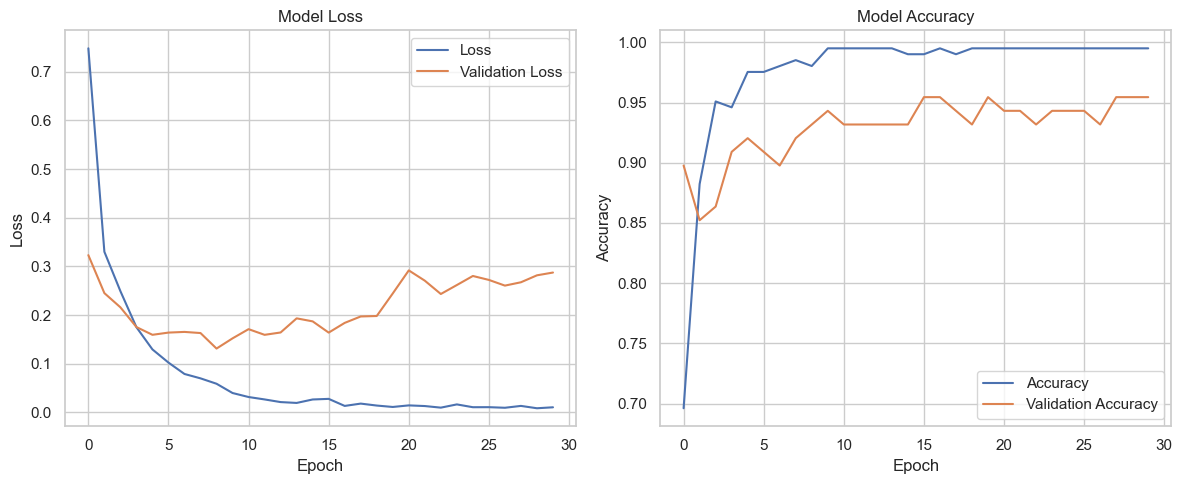

In [140]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['sparse_categorical_accuracy'], label='Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [144]:
# Buat data baru
data_baru = pd.DataFrame({
    'pm10': [200],  
    'pm25': [200],  
    'so2': [50], 
    'co': [99],  
    'o3': [30],    
    'no2': [60],   
    'month': [9],   
    'day': [15]    
})

# Normalisasi data baru
data_baru_scaled = scaler.transform(data_baru)

# Gunakan model untuk prediksi
prediksi = model.predict(data_baru_scaled)
predicted_categories = label_encoder.inverse_transform(np.argmax(prediksi, axis=1))

data_baru['predicted_category'] = predicted_categories

print(data_baru)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
   pm10  pm25  so2  co  o3  no2  month  day predicted_category
0   200   200   50  99  30   60      9   15        TIDAK SEHAT
